IPL 2024 RCB Vs DC Analysis:

This dataset provides comprehensive information for analyzing player performance, game dynamics, and match outcomes in cricket. 

Basics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
IPL = pd.read_csv('innings_deliveries.csv')
IPL

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[]
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[]
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]


In [3]:
IPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   team         247 non-null    object
 1   over         247 non-null    int64 
 2   batter       247 non-null    object
 3   bowler       247 non-null    object
 4   non_striker  247 non-null    object
 5   runs_batter  247 non-null    int64 
 6   runs_extras  247 non-null    int64 
 7   runs_total   247 non-null    int64 
 8   player_out   19 non-null     object
 9   wicket_kind  19 non-null     object
 10  fielders     247 non-null    object
dtypes: int64(4), object(7)
memory usage: 21.4+ KB


In [4]:
IPL.shape

(247, 11)

In [5]:
IPL.describe()

,over,runs_batter,runs_extras,runs_total
count,247.000000,247.000000,247.000000,247.000000
mean,9.477733,1.259109,0.064777,1.323887
std,5.678238,1.688576,0.246632,1.657809
min,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000
50%,10.000000,1.000000,0.000000,1.000000
75%,14.500000,1.000000,0.000000,1.000000
max,19.000000,6.000000,1.000000,6.000000


1.	Clean the dataset (don't drop any values as it will affect the dataset)

In [6]:
IPL.isnull().sum()

team             0
over             0
batter           0
bowler           0
non_striker      0
runs_batter      0
runs_extras      0
runs_total       0
player_out     228
wicket_kind    228
fielders         0
dtype: int64

2. Using pandas and matplotlib, write a program to visualize the run distribution per over for both teams.Plot a line chart to show how scoring trends changed throughout the innings.

In [7]:
run_distribution_overwise = IPL.groupby(['team', 'over'])['runs_total'].sum().reset_index()

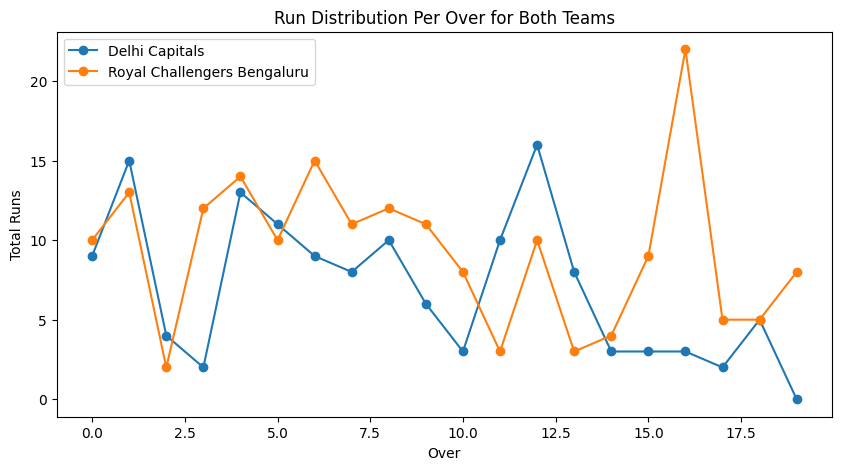

In [8]:
plt.figure(figsize=(10,5))
for team in run_distribution_overwise['team'].unique():
    team_data = run_distribution_overwise[run_distribution_overwise['team'] == team]
    plt.plot(team_data['over'], team_data['runs_total'], marker = 'o', label=team)

plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.title('Run Distribution Per Over for Both Teams')
plt.legend()
plt.show()

3.	Create a bar chart to visualize the top contributors in terms of runs

In [9]:
top_contributors = IPL.groupby('batter')['runs_batter'].sum().sort_values(ascending=False)
top_contributors

batter
AR Patel           57
RM Patidar         52
WG Jacks           41
C Green            32
SD Hope            29
V Kohli            27
J Fraser-McGurk    21
MK Lomror          13
Rasikh Salam       10
Kuldeep Yadav       6
F du Plessis        6
KV Sharma           6
T Stubbs            3
Mukesh Kumar        3
Kumar Kushagra      2
Abishek Porel       2
DA Warner           1
KD Karthik          0
I Sharma            0
Swapnil Singh       0
Name: runs_batter, dtype: int64

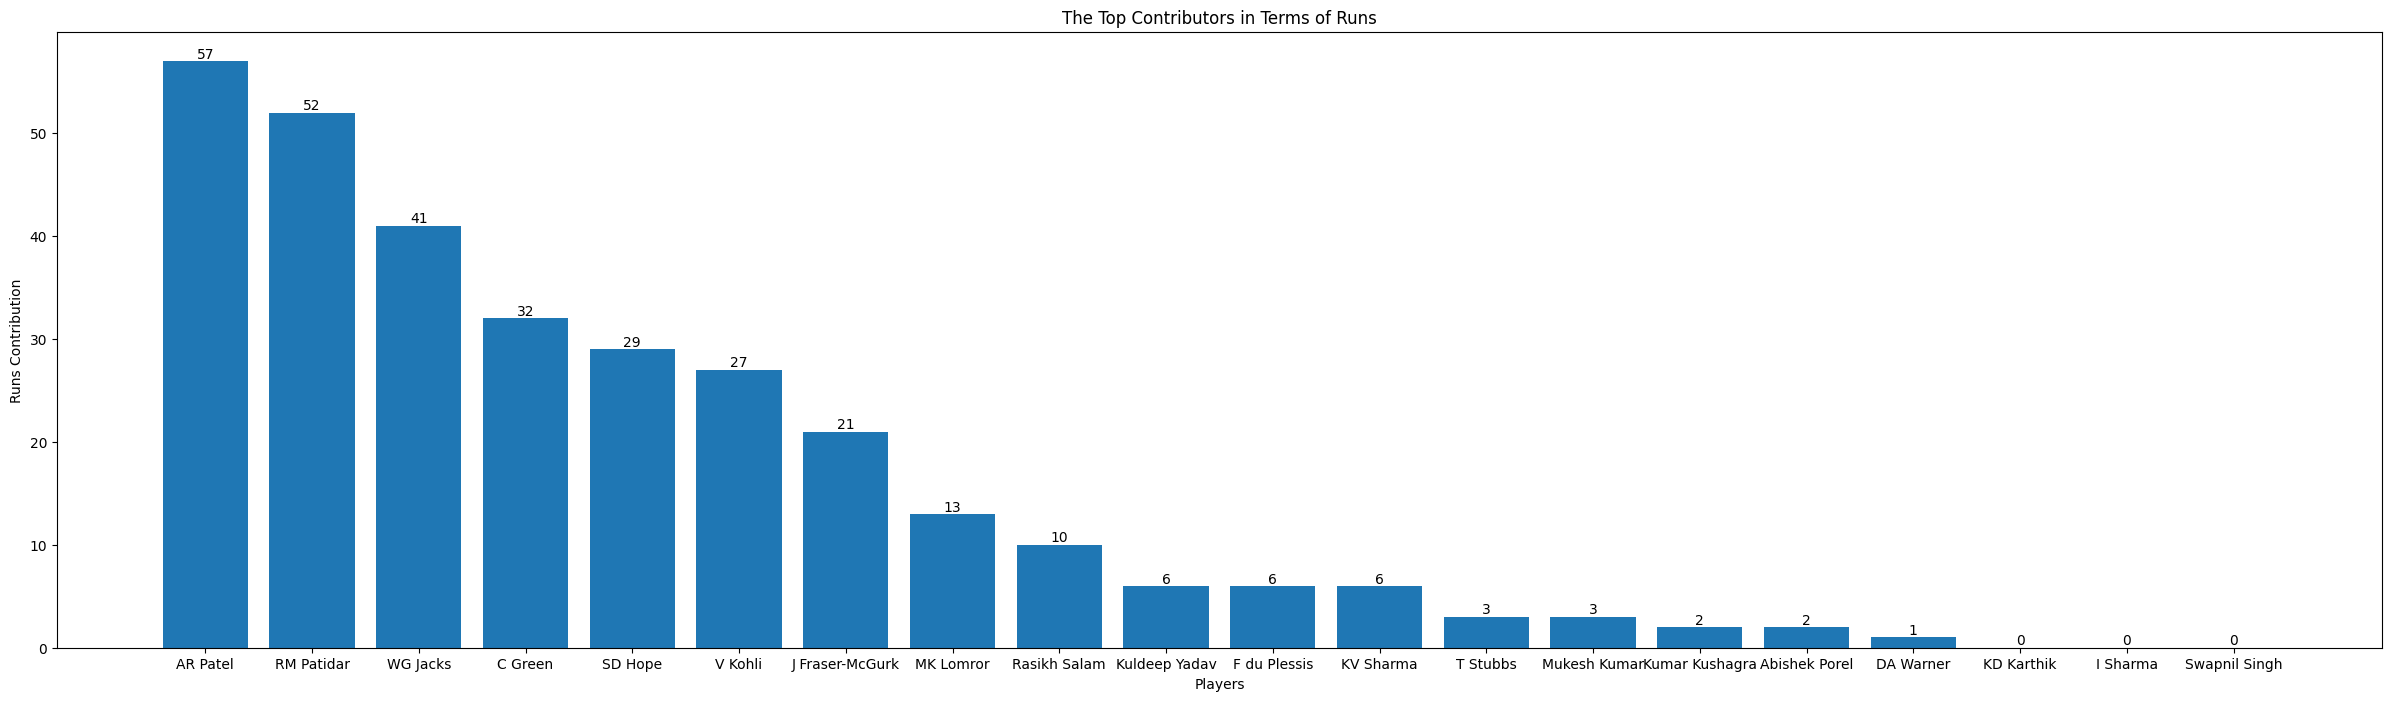

In [10]:
plt.figure(figsize=(30, 8))
plt.bar(top_contributors.index, top_contributors.values)
plt.xlabel('Players')
plt.ylabel('Runs Contribution')
plt.title('The Top Contributors in Terms of Runs')

for x, y in zip(top_contributors.index, top_contributors.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

# zip() pairs elements from two sequences item-by-item.

plt.show()

4.	Create a chart to visualize the combined bar and line plot provides a comprehensive overview of the bowling performance of each team.(Wickets and Economy Rate)

In [11]:
IPL['Wickets'] = IPL['player_out'].notna().astype(int)
IPL['Wickets'] 
IPL

# notna() is used to check whether values are NOT missing in a Pandas object.

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders,Wickets
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[],0
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[],0
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[],0
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[],0
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[],0
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[],0
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[],0
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[],0


In [12]:
team_wickets = IPL.groupby('team')['Wickets'].sum()
team_wickets

team
Delhi Capitals                 10
Royal Challengers Bengaluru     9
Name: Wickets, dtype: int64

In [13]:
team_runs = IPL.groupby('team')['runs_total'].sum()
team_runs

team
Delhi Capitals                 140
Royal Challengers Bengaluru    187
Name: runs_total, dtype: int64

In [14]:
team_overs = IPL.groupby('team')['over'].unique()
team_overs

team
Delhi Capitals                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Royal Challengers Bengaluru    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Name: over, dtype: object

In [15]:
team_economy = team_runs / 20
team_economy

team
Delhi Capitals                 7.00
Royal Challengers Bengaluru    9.35
Name: runs_total, dtype: float64

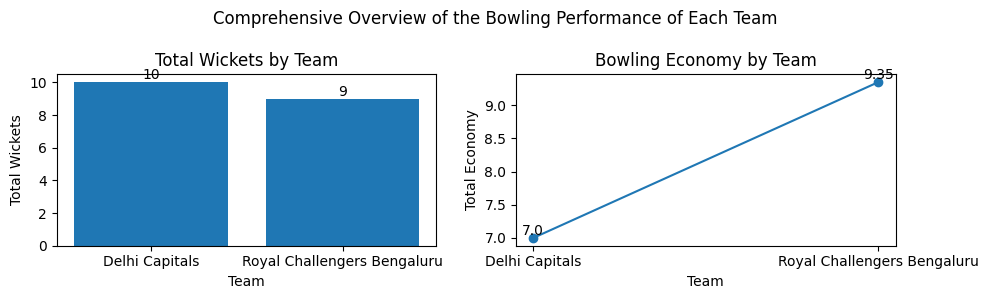

In [16]:
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.bar(team_wickets.index, team_wickets.values)
plt.xlabel('Team')
plt.ylabel('Total Wickets')
plt.title('Total Wickets by Team')

for x, y in zip(team_wickets.index, team_wickets.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.subplot(1,2,2)
plt.plot(team_economy.index, team_economy.values, marker='o')
plt.xlabel('Team')
plt.ylabel('Total Economy')
plt.title('Bowling Economy by Team')

for x, y in zip(team_economy.index, team_economy.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.suptitle('Comprehensive Overview of the Bowling Performance of Each Team')
plt.tight_layout()
plt.show()

5.	Create a pie chart to visualize the  types of dismissals that occurred during the match to understand how most wickets were taken (e.g., caught, bowled, run out).

In [17]:
types_of_dismissals = IPL[IPL['Wickets']== 1]['wicket_kind'].value_counts()
types_of_dismissals

wicket_kind
caught     13
run out     4
lbw         1
bowled      1
Name: count, dtype: int64

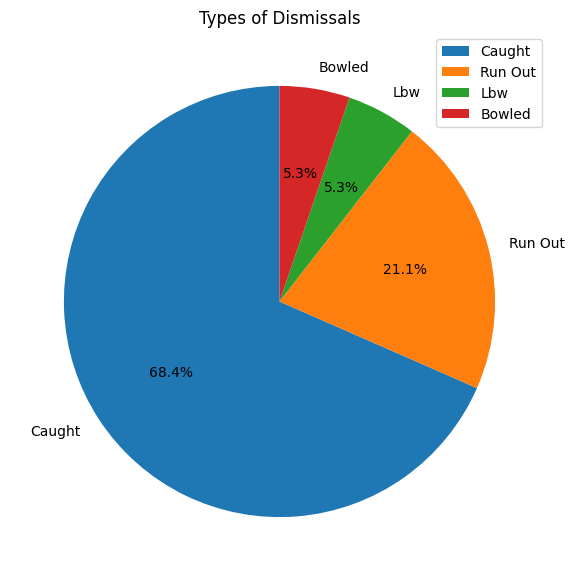

In [18]:
label = ['Caught', 'Run Out', 'Lbw', 'Bowled']
plt.figure(figsize=(7, 7))
plt.pie(types_of_dismissals.values, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Types of Dismissals')
plt.legend(loc='upper right')
plt.show()


6.	Perform Partnerships Analysis by calculating and visualizing the most productive batting partnerships in the match

In [19]:
partnership = IPL.groupby(['batter','non_striker'])['runs_total'].sum().sort_values(ascending=False).head(10)
partnership

batter           non_striker  
RM Patidar       WG Jacks         54
WG Jacks         RM Patidar       34
AR Patel         SD Hope          30
                 Rasikh Salam     27
SD Hope          AR Patel         26
C Green          MK Lomror        22
V Kohli          F du Plessis     16
MK Lomror        C Green          15
J Fraser-McGurk  Abishek Porel    14
V Kohli          WG Jacks         12
Name: runs_total, dtype: int64

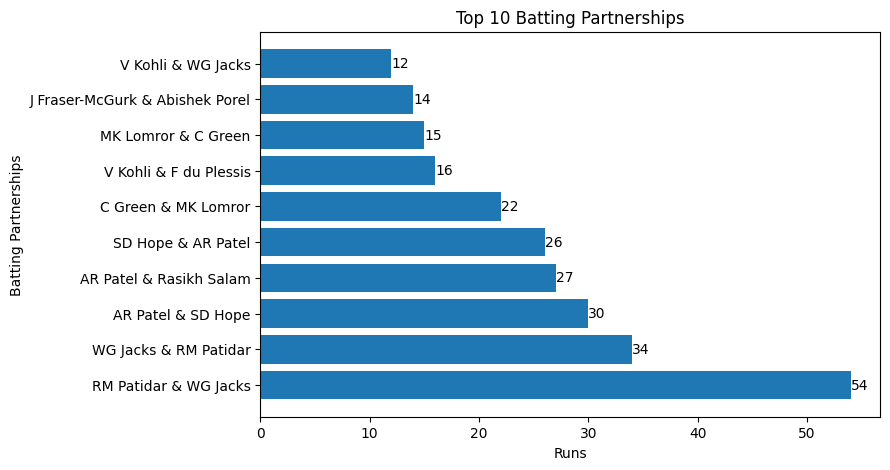

In [20]:
labels = [f"{a} & {b}" for a, b in partnership.index]

plt.figure(figsize=(8, 5))
plt.barh(labels, partnership.values)
plt.xlabel('Runs')
plt.ylabel('Batting Partnerships')
plt.title('Top 10 Batting Partnerships')

for i, value in enumerate(partnership.values):
    plt.text(value, i, str(value), va='center')  

#enumerate is a Python built-in function that lets you loop over a list (or any iterable) and get two things at the same time:
# The position (index) of the item in the list
# The item itself

plt.show()


7.	Perform a Phase Analysis to examine how teams performed during different stages of their innings; Powerplay (first 6 overs), Middle overs (7-15), and Death overs (16-20).(look at scoring rates and wicket loss during these phases. This can offer insights into the team’s tactical approach and execution under varying conditions)

In [21]:
def phase_analysis(over):
    if over <= 6:
        return 'Powerplay'
    elif over <=15:
        return 'Middle Overs'
    else:
        return 'Death Overs'

In [22]:
IPL['Phase'] = IPL['over'].apply(phase_analysis)

In [23]:
scoring_rates = IPL.groupby(['team', 'Phase'])['runs_total'].sum()
scoring_rates

team                         Phase       
Delhi Capitals               Death Overs     10
                             Middle Overs    67
                             Powerplay       63
Royal Challengers Bengaluru  Death Overs     40
                             Middle Overs    71
                             Powerplay       76
Name: runs_total, dtype: int64

In [24]:
wicket_loss = IPL.groupby(['team','Phase'])['Wickets'].sum()
wicket_loss

team                         Phase       
Delhi Capitals               Death Overs     2
                             Middle Overs    4
                             Powerplay       4
Royal Challengers Bengaluru  Death Overs     5
                             Middle Overs    2
                             Powerplay       2
Name: Wickets, dtype: int64

8.	Write a program to calculate the strike rate for each batter and print the top 10 batters.

In [25]:
balls = IPL.groupby('batter').size()
runs = IPL.groupby('batter')['runs_batter'].sum()

strike_rate = (runs / balls) * 100

top_10 = strike_rate.sort_values(ascending=False).head(10)
top_10


batter
J Fraser-McGurk    262.500000
V Kohli            192.857143
RM Patidar         152.941176
KV Sharma          150.000000
AR Patel           142.500000
WG Jacks           136.666667
C Green            133.333333
MK Lomror          130.000000
SD Hope            120.833333
F du Plessis        85.714286
dtype: float64

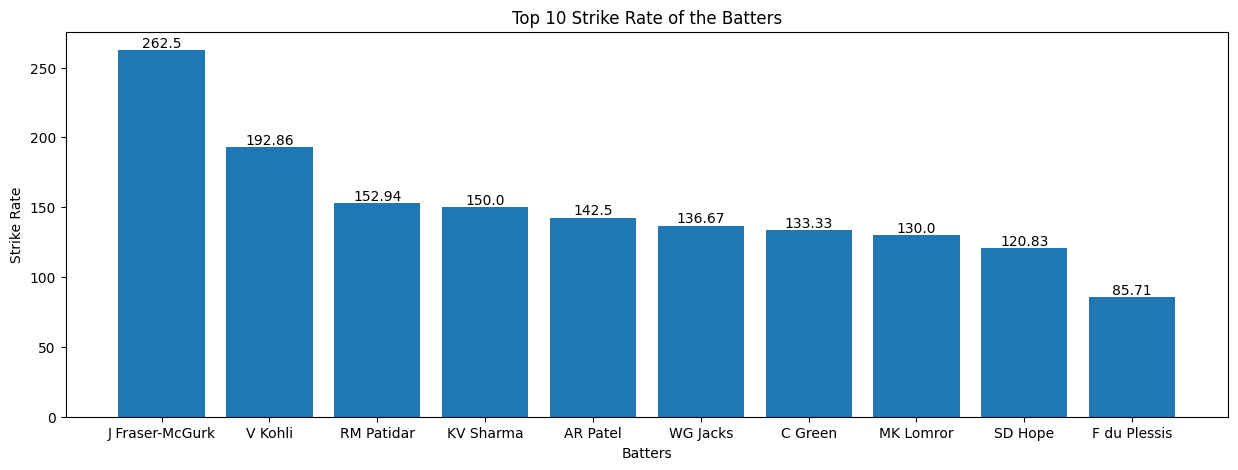

In [ ]:
plt.figure(figsize=(15, 5))

plt.bar(top_10.index, top_10.values)
plt.xlabel('Batters')
plt.ylabel('Strike Rate')
plt.title('Top 10 Strike Rate of the Batters')

for i, value in enumerate(top_10.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')  

plt.show()

9.	Plot a graph to show the strike rate across different phases for top performers

In [27]:
a = IPL.groupby(['batter', 'Phase'])['runs_batter'].sum()
b = IPL.groupby(['batter', 'Phase']).size()
Phasewise_strike_rate = (a / b) * 100
Phasewise_strike_rate

batter           Phase       
AR Patel         Middle Overs    141.379310
                 Powerplay       145.454545
Abishek Porel    Powerplay        66.666667
C Green          Death Overs     171.428571
                 Middle Overs     80.000000
DA Warner        Powerplay        50.000000
F du Plessis     Powerplay        85.714286
I Sharma         Death Overs       0.000000
J Fraser-McGurk  Powerplay       262.500000
KD Karthik       Death Overs       0.000000
KV Sharma        Death Overs     150.000000
Kuldeep Yadav    Death Overs      50.000000
                 Middle Overs    100.000000
Kumar Kushagra   Powerplay        66.666667
MK Lomror        Death Overs     233.333333
                 Middle Overs     85.714286
Mukesh Kumar     Death Overs      28.571429
                 Middle Overs    100.000000
RM Patidar       Middle Overs    115.789474
                 Powerplay       200.000000
Rasikh Salam     Middle Overs     83.333333
SD Hope          Middle Overs     88.888889
  

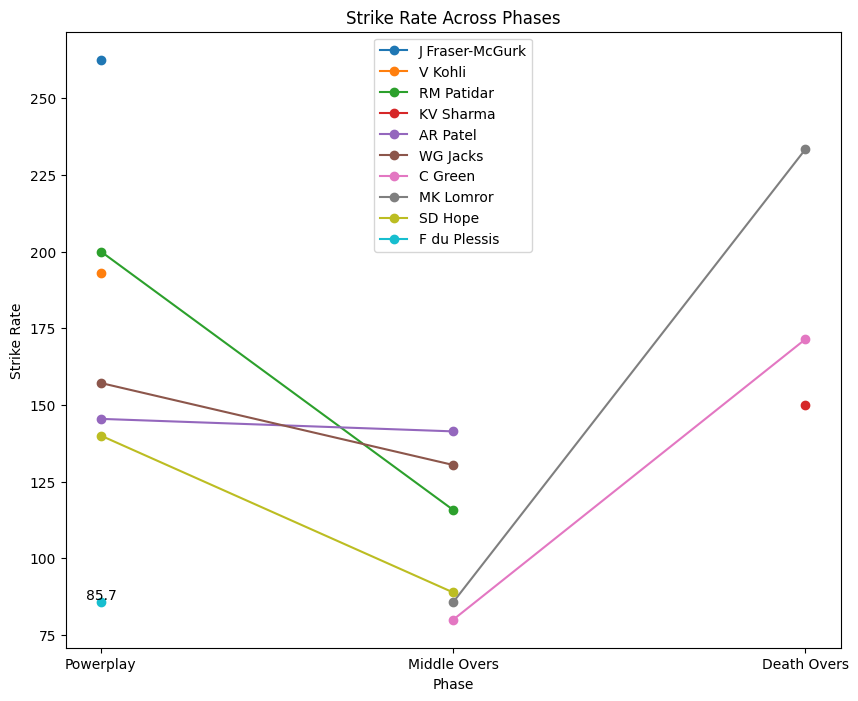

In [28]:
plt.figure(figsize=(10,8))
for batter in top_10.index:
    data = Phasewise_strike_rate[batter]
    plt.plot(data.index, data.values, marker='o', label=batter)

plt.xlabel('Phase')
plt.ylabel('Strike Rate')
plt.title('Strike Rate Across Phases')
plt.legend()

for i, value in zip(data.index, data.values):
    plt.text(i, value, str(round(value, 1)), ha='center', va='bottom')

plt.show()





10.	Plot a graph to show the Cumulative Runs with Wickets for RCB and DC

In [29]:
rcb = IPL[IPL['team'] == 'Royal Challengers Bengaluru']

In [30]:
dc = IPL[IPL['team'] == 'Delhi Capitals']

In [31]:
rcb_wickets = rcb.groupby('team')['Wickets'].sum()
rcb_wickets

team
Royal Challengers Bengaluru    9
Name: Wickets, dtype: int64

In [32]:
rcb_runs = rcb.groupby('team')['runs_total'].sum()
rcb_runs

team
Royal Challengers Bengaluru    187
Name: runs_total, dtype: int64

In [33]:
dc_wickets = dc.groupby('team')['Wickets'].sum()
dc_wickets

team
Delhi Capitals    10
Name: Wickets, dtype: int64

In [34]:
dc_runs = dc.groupby('team')['runs_total'].sum()
dc_runs

team
Delhi Capitals    140
Name: runs_total, dtype: int64

In [49]:
over_data = rcb.groupby(['team', 'over']).agg({'runs_total': 'sum','Wickets': 'sum'}).reset_index()

over_data['cumulative_runs'] = over_data.groupby('team')['runs_total'].cumsum()
over_data['cumulative_wickets'] = over_data.groupby('team')['Wickets'].cumsum()

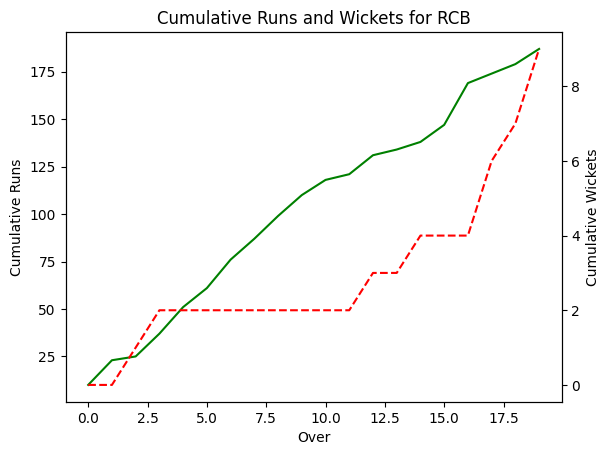

In [50]:

fig, ax1 = plt.subplots()

ax1.plot(over_data['over'], over_data['cumulative_runs'], label='Runs', color = 'green')
ax1.set_xlabel('Over')
ax1.set_ylabel('Cumulative Runs')

ax2 = ax1.twinx()
ax2.plot(over_data['over'], over_data['cumulative_wickets'], linestyle='--', label='Wickets', color = 'red')
ax2.set_ylabel('Cumulative Wickets')

plt.title('Cumulative Runs and Wickets for RCB')
plt.show()


In [44]:
over_data = dc.groupby(['team', 'over']).agg({'runs_total': 'sum','Wickets': 'sum'}).reset_index()

over_data['cumulative_runs'] = over_data.groupby('team')['runs_total'].cumsum()
over_data['cumulative_wickets'] = over_data.groupby('team')['Wickets'].cumsum()

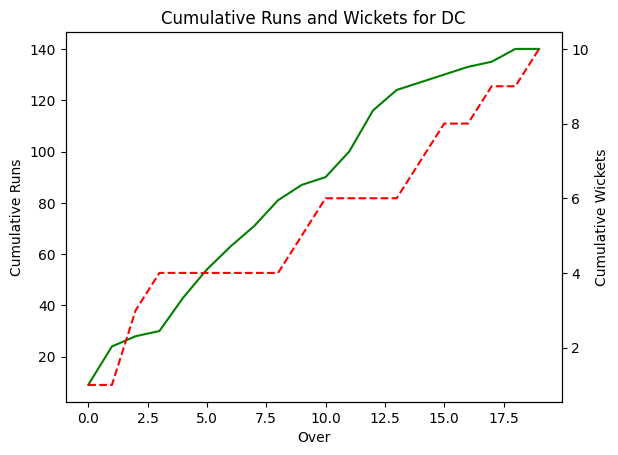

In [46]:
fig, ax1 = plt.subplots()

ax1.plot(over_data['over'], over_data['cumulative_runs'], label='Runs', color = 'green')
ax1.set_xlabel('Over')
ax1.set_ylabel('Cumulative Runs')

ax2 = ax1.twinx()
ax2.plot(over_data['over'], over_data['cumulative_wickets'], linestyle='--', label='Wickets', color = 'red')
ax2.set_ylabel('Cumulative Wickets')

plt.title('Cumulative Runs and Wickets for DC')
plt.show()